# IMPORTS Y PACKAGES

In [51]:
#Packages to install

#!pip install pandas
#!pip install numpy
#!pip install scipy
#!pip install matplotlib
#!pip install scikit-learn
#!pip install ipywidgets

In [52]:
#Imports

import math
import time as time
import pandas as pd
import numpy as np
import scipy as sp
import random as rd
import ipywidgets as widgets
from ipywidgets import HBox, VBox, interact, interact_manual,interactive
from IPython.display import display,clear_output
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from copy import deepcopy
from sklearn import preprocessing

#Interactive plot
#%matplotlib notebook
#%matplotlib inline

# CLASES

## Clases para generar y mostrar ejemplos

In [53]:
class DataSet:
    
    data = []
    points = []
    drawPoint = []
    
    def __init__(self, file_path):
        self.file_path = file_path
        self.__read(',')
        
    #Derived
    def __read(self, sep):
        self.data = pd.read_csv(self.file_path, sep=sep,encoding='utf8')
        self.drawPoint = []
        points = []
        allX = []
        allY =[]
                
        for index, row in self.data.iterrows():
            p = Point(row['Coord X'],row['Coord Y'])
            points.append(p)
            allX.append(p.x)
            allY.append(p.y)
        
        self.points = points
        self.drawPoint.append(allX)
        self.drawPoint.append(allY)
        
        return self.points
        
    def drawData(self, drawType):       
        plt.plot(self.drawPoint[0],self.drawPoint[1],drawType)

In [54]:
class Canvas:
    
    width = 0
    height = 0
    data = []
    points = []

    def __init__(self, width, height, data):
        self.width = width
        self.height = height
        self.data = data
        self.points = self.__dataToPoints()
   
    #Derived
    def __dataToPoints(self):
        res = []        
        for i in range (0,len(self.data)):            
            for j in range(0,self.data[i].numOfPoints):                
                point=[]
                point.append(self.data[i].xVals[j])
                point.append(self.data[i].yVals[j])              
                point.append("Circulo"+str(i+1))
                
                res.append(point)
        return res
    
    def rawPoints(self,rawData):
        aux = []
        res = []
        
        for i in range (0,len(rawData)):
            
            aux.append(rawData[i].x)
            aux.append(rawData[i].y)
            
            res.append(aux)
            
            aux = []
            
        self.points = res;
    
    def drawData(self):
        for i in range (0,len(self.points)):
            plt.plot(self.points[i][0],self.points[i][1],'ro')
            
    def drawDataPlot(self):
        xs = []
        ys = []
        
        for i in range (0,len(self.points)):
            xs.append(self.points[i][0])
            ys.append(self.points[i][1])
        
        return self.data,xs,ys
    
    def removeRandomPoints(self,percentage):
        if len(self.points) != 0:
            pointsToRemove = int(len(self.points)*percentage)
            newArrayLen = len(self.points)

            for i in range (0, pointsToRemove):
                j = rd.randint(0,newArrayLen-1)
                self.points.pop(j)
                newArrayLen -= 1
        else:
            print("Data debe tener al menos un punto.")
    
    def insertNoise(self,devX,devY):
        noiseX = np.random.normal(0,devX,len(self.points))
        noiseY = np.random.normal(0,devY,len(self.points))
        
        for i in range(0,len(self.points)):
            self.points[i][0] += noiseX[i]
            self.points[i][1] += noiseY[i]
            
    def drawRandomCircunferencesRandomRadius(self,numOfCircunferences,precision):   
        for i in range (0,numOfCircunferences):
            
            maxRad = 0
            
            if(self.width > self.height):
                maxRad = self.height/2
            else:
                 maxRad = self.width/2
            
            radius = rd.uniform(1,maxRad)
            centerX = rd.uniform(radius,self.width-radius)
            centerY = rd.uniform(radius,self.height-radius)
                       
            c = Circunference(Point(centerX,centerY),radius,precision)
            self.data.append(c)
            c.draw()
        
        self.points = self.__dataToPoints()
            
    def drawRandomCircunferencesRadiusRange(self,numOfCircunferences, minRadius, maxRadius, precision):   
        for i in range (0,numOfCircunferences):
                       
            radius = rd.uniform(minRadius,maxRadius)
            centerX = rd.uniform(radius,self.width-radius)
            centerY = rd.uniform(radius,self.height-radius)                       
            c = Circunference(Point(centerX,centerY),radius,precision)
            
            self.data.append(c)
            c.draw()
            
        self.points = self.__dataToPoints()
        
    def drawRandomCircunferencesRadiusRangePlot(self,numOfCircunferences, minRadius, maxRadius, precision):    
        for i in range (0,numOfCircunferences):
                       
            radius = rd.uniform(minRadius,maxRadius)
            centerX = rd.uniform(radius,self.width-radius)
            centerY = rd.uniform(radius,self.height-radius)                       
            c = Circunference(Point(centerX,centerY),radius,precision)
            
            self.data.append(c)
            
        self.points = self.__dataToPoints()

## Clases del dominio del problema

In [55]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def getFurthestPoint(self,points):
        res = Point(0,0)
        auxDis = 0.0
        
        for i in range(0,len(points)):
            dis = self.calculateDistanceToPoint(points[i])
            
            if(dis>auxDis):
                auxDis = dis
                res = points[i]
            
        return res, auxDis
    
    def getDistancedPoints(self,points,maxDistance):
        res1 = Point(0,0)
        res2 = Point(0,0)
        auxDis1 = 0.0
        auxDis2 = 0.0
        stop1 = 0
        stop2 = 0
        
        for i in range(0,len(points)):
                
            dis = self.calculateDistanceToPoint(points[i])
            
            if(stop1 == 0 and dis > auxDis1 and dis < maxDistance/2):
                auxDis1 = dis
                res1 = points[i]
                
            if(stop2 == 0 and dis > auxDis2 and dis < maxDistance/4):
                auxDis2 = dis
                res2 = points[i]
            
            if(stop1 == 0 and dis >= maxDistance/2 and dis < maxDistance):
                auxDis1 = dis
                res1 = points[i]
                stop1 = 1
                
            if(stop2 == 0 and dis >= maxDistance/4 and dis < auxDis1):
                auxDis2 = dis
                res2 = points[i]
                stop2 = 1
                
        for i in range(0,len(points)):
                
            dis = self.calculateDistanceToPoint(points[i])
        
            if(stop2 == 0 and dis > auxDis2 and dis < maxDistance/4):
                auxDis2 = dis
                res2 = points[i]
                
            if(stop2 == 0 and dis >= maxDistance/4 and dis < auxDis1):
                auxDis2 = dis
                res2 = points[i]
                stop2 = 1
            
        return res1, res2
    
    def calculateDistanceToCluster(self,c):
        dis = self.calculateDistanceToPoint(c.center)
        return abs(dis - c.radius)
    
    def calculateDistanceToCluster_noAbs(self,c):
        dis = self.calculateDistanceToPoint(c.center)
        return dis - c.radius
    
    def calculateThreshold(self,circles):
        distances = []
        distances_n = []
        
        for i in range(0,len(circles)):
            distances.append(self.calculateDistanceToCluster(circles[i]))
                
        mod = 0.000000000000000000001
        for i in range(0,len(distances)):
            mod += distances[i]
            
        distances_n = (mod - np.array(distances))*(1/mod)
        
        return distances_n
    
    def calculatePerpendicular(self,p):
        precision = 0.000001
        
        #Punto medio
        xMean = (self.x + p.x)/2
        yMean = (self.y + p.y)/2
        
        if(p.y - self.y == 0):
            self.y += precision
        
        if(p.x - self.x == 0):
            self.x += precision
        
        #Pendiente usando: y - y1 = m(x - x1) y  mp = -1/m
        m = -1/((p.y - self.y)/(p.x - self.x))
        
        #Se devuelve [x,y,b]
        perpendicular = ([-m,1,m*(-xMean)+yMean])
        
        return perpendicular
    
    def calculateDistanceToPoint(self,p):
        disX = p.x - self.x
        disY = p.y - self.y
        dis = math.sqrt(disX*disX + disY*disY)
        
        return dis
    
    def equals(self,p):
        if(self.x == p.x and self.y == p.y):
            return 1
        else:
            return 0
        
    def print(self):
        print("(",self.x,",",self.y,")")

In [56]:
class Circunference:
    
    center = 0
    radius = 0
    numOfPoints = 0
    xVals = []
    yVals = []
    
    def __init__(self, center, radius, numOfPoints):
        self.center = center
        self.radius = radius
        self.numOfPoints = numOfPoints
        self.__calculate()
      
    #Derived
    def __calculate(self):
        self.xVals = []
        self.yVals = []
        
        alpha = 2*math.pi/self.numOfPoints
        i = 0     
        while i < 2*math.pi:
            self.xVals.append(self.center.x + self.radius*math.cos(i))
            self.yVals.append(self.center.y + self.radius*math.sin(i))
            i += alpha
            
    def update(self, center, radius):
        self.center = center
        self.radius = radius
        self.__calculate()
    
    def draw(self):
        if(len(self.xVals) == 0 or len(self.yVals) == 0):
            print('Error when drawing: Values are empty')
        else:
            xPrimeVals = self.xVals
            xPrimeVals.append(xPrimeVals[0])
            
            yPrimeVals = self.yVals
            yPrimeVals.append(yPrimeVals[0])
            
            plt.plot(xPrimeVals,yPrimeVals)
            plt.plot(self.center.x,self.center.y,'bo')
    
    def drawPlot(self):
        fig = plt.figure('fig')
        ax = fig.add_subplot(111)
                
        if(len(self.xVals) == 0 or len(self.yVals) == 0):
            print('Error when drawing: Values are empty')
        else:
            xPrimeVals = self.xVals
            xPrimeVals.append(xPrimeVals[0])
            
            yPrimeVals = self.yVals
            yPrimeVals.append(yPrimeVals[0])
            
            ax.plot(xPrimeVals,yPrimeVals)
            ax.plot(self.center.x,self.center.y,'bo')
            
            return fig,ax
            
    def drawSubplot(self,axs,it):
        if(len(self.xVals) == 0 or len(self.yVals) == 0):
            print('Error when drawing: Values are empty')
        else:
            xPrimeVals = self.xVals
            xPrimeVals.append(xPrimeVals[0])
            
            yPrimeVals = self.yVals
            yPrimeVals.append(yPrimeVals[0])
            
            axs[it].plot(xPrimeVals,yPrimeVals)
            axs[it].plot(self.center.x,self.center.y,'bo')
            
    def calculateWithCircumcenter(p1,p2,p3):
        #Mediatrices
        perp1 = p1.calculatePerpendicular(p2)
        perp2 = p1.calculatePerpendicular(p3)
        
        A = [[perp1[0],perp1[1]],[perp2[0],perp2[1]]]
        
        #Circuncentro
        if(np.linalg.det(A)==0):
            return Point(0,0),-1
        else:
            B = [[perp1[2]],[perp2[2]]]
            X = np.linalg.solve(A,B)
            circumcenter = Point(X[0],X[1])
            
            #Radio
            radius = circumcenter.calculateDistanceToPoint(p1)

            return circumcenter, radius
        
    def calculateWithBarycentre(list_points):
        sumX = 0
        sumY = 0
        radius = 0
        
        for i in range(0,len(list_points)):
            sumX = sumX + list_points[i].x
            sumY = sumY + list_points[i].y
        
        center = Point(sumX/len(list_points),sumY/len(list_points))
        
        for i in range(0,len(list_points)):
            radius = radius + center.calculateDistanceToPoint(list_points[i])
        
        radius = radius/len(list_points)
        
        return center,radius

## Clases del algoritmo

In [57]:
class ClusteringSolver:
    
    clustersNumber = 0
    points = []
    
    clusters = []
    threshold = []
    
    sol_clusters = []
    sol_threshold = []
    
    def __init__(self,filePath,clustersNumber):
        self.clustersNumber = clustersNumber
        self.points = DataSet(filePath).points
        
        self.clusters = []
                    
    def initRandomClusters(self):
        initialClusters = []
            
        for i in range(0,self.clustersNumber):
            
            indexOfRandomPoint = rd.randint(0,len(self.points)-1)
            randomPoint = self.points[indexOfRandomPoint]
            randomRadius = rd.uniform(1,10)

            cluster = Circunference(randomPoint,randomRadius,20)            
            initialClusters.append(cluster)

        self.clusters = initialClusters
    
    def calculateThreshold(self):
        threshold = []
        
        for i in range(0,len(self.points)):
            point = self.points[i]
            threshold.append(point.calculateThreshold(self.clusters))
        
        return threshold
       
    def getClustersAssignment(self,threshold):
        clustersAssignment = []  
        
        for i in range(0,len(threshold)):
            tuplePointCluster = []
            clusterIndex = 0
            thresholdVal = 0
            point = Point(0,0)
            
            for j in range(0,len(threshold[i])):
                if(j==0):
                    thresholdVal = threshold[i][j]
                    point = self.points[i]
                    clusterIndex = j
                else:
                    if(threshold[i][j] > thresholdVal):
                        thresholdVal = threshold[i][j]
                        point = self.points[i]
                        clusterIndex = j
                        
            tuplePointCluster.append(point)
            tuplePointCluster.append(clusterIndex)
            clustersAssignment.append(tuplePointCluster)
            
            tuplePointCluster = []
            clusterIndex = 0
            point = Point(0,0)
            thresholdVal = 0
    
        return clustersAssignment
    
    def groupPointsByCluster(self,threshold):
        clustersAssignment = self.getClustersAssignment(threshold)
        
        pointsGroupedByCluster = []
        
        for k in range(0,len(self.clusters)):
                                       
            cluster = []

            for z in range(0,len(clustersAssignment)):

                if(k == clustersAssignment[z][1]):
                    point = Point(clustersAssignment[z][0].x,clustersAssignment[z][0].y)
                    cluster.append(point)

            pointsGroupedByCluster.append(cluster)
        
        return pointsGroupedByCluster, clustersAssignment
    
    def calculateBestFitPoints(self,listOfPoints):     
        randomVals = rd.sample(listOfPoints,3)
        
        return randomVals[0],randomVals[1],randomVals[2]
    
    def calculateCluster(self,mode,points):
        if len(points) == 0:
            center = Point(0,0)
            radius = -1
        else:
            if mode == 'c' and len(points)>2:            
                radius = -1

                while radius == -1:
                    p1,p2,p3 = self.calculateBestFitPoints(points)
                    center, radius = Circunference.calculateWithCircumcenter(p1,p2,p3)        
            else:
                    center, radius = Circunference.calculateWithBarycentre(points)  
        
        return center, radius
        
    def learn(self,generations,precision,limit,mode):
        generationNumber = 0
        generationClusters = []
        generationAssignment = []    
        generationDist = 0       

        while generationNumber < generations:
        
            self.initRandomClusters()
            
            keepIterating = 1
            previousIteration = []
            
            limIt = 0
            while keepIterating == 1:
                            
                previousIteration = deepcopy(self.clusters)
                                
                self.threshold = self.calculateThreshold()
                pointsGroupedByCluster, clustersAssignment = self.groupPointsByCluster(self.threshold)
                
                dirtyGen = 0
                for k in range(0,len(pointsGroupedByCluster)):
                    center,radius = self.calculateCluster(mode,pointsGroupedByCluster[k])
                    
                    if radius == -1:
                        generationNumber -= 1
                        dirtyGen = 1
                        break
                        
                    self.clusters[k].update(center,radius)
            
                if dirtyGen == 1:
                    break
                             
                dirtyIt = 0
                for j in range(0,len(previousIteration)):
                    
                    prevCenter = previousIteration[j].center
                    prevRadius = previousIteration[j].radius
                    
                    actualCenter = self.clusters[j].center
                    actualRadius = self.clusters[j].radius
                    
                    centerCond = prevCenter.calculateDistanceToPoint(actualCenter) > precision
                    radiusCond = abs(prevRadius - actualRadius) > precision

                    if centerCond or radiusCond:
                        dirtyIt = 1
                
                if(dirtyIt == 0 or limIt == limit):                   
                    keepIterating = 0       
                
                limIt += 1
            
            if generationNumber <= 0:
                generationClusters = self.clusters
                generationAssignment = clustersAssignment
                
                for j in range(0,len(generationAssignment)):
                    generationDist += generationAssignment[j][0].calculateDistanceToCluster(generationClusters[generationAssignment[j][1]])
            else:
                tempClusters = self.clusters
                tempAssignment = clustersAssignment
                dist = 0
                for j in range(0,len(tempAssignment)):
                    dist += tempAssignment[j][0].calculateDistanceToCluster(tempClusters[tempAssignment[j][1]])
                
                if(dist < generationDist):
                    generationClusters = tempClusters
                    generationAssignment = tempAssignment
                    generationDist = dist
            
            generationNumber += 1
        
        self.sol_clusters = generationClusters
        self.sol_threshold = generationAssignment

In [58]:
class Solution:
    
    clusteringSolver = 0
    finalClusters = []
    finalAssignment = []
    
    def __init__(self, clusteringSolver):
        self.clusteringSolver = clusteringSolver
        self.finalClusters = self.clusteringSolver.sol_clusters
        self.finalAssignment = self.clusteringSolver.sol_threshold
       
    def eraseNoise(self,minThreshold):
        pointsToErase = []
        
        for i in range(len(self.finalAssignment)-1,-1,-1):
            
            threshold = self.finalAssignment[i][0].calculateThreshold(self.finalClusters)
            
            if(threshold[self.finalAssignment[i][1]] < minThreshold):
                pointsToErase.append(i)
                               
        for i in range(0,len(pointsToErase)):
            self.finalAssignment.pop(pointsToErase[i])
        
    def drawSolution(self,minDistanceErase):
        self.eraseNoise(minDistanceErase)
        
        for i in range (0,len(self.finalClusters)):
            self.finalClusters[i].draw()

        for i in range(0,len(self.finalAssignment)):
            if(self.finalAssignment[i][1] == 0):
                plt.plot(self.finalAssignment[i][0].x,self.finalAssignment[i][0].y,'go')
            elif(self.finalAssignment[i][1] == 1):
                plt.plot(self.finalAssignment[i][0].x,self.finalAssignment[i][0].y,'ko')
            elif(self.finalAssignment[i][1] == 2):
                plt.plot(self.finalAssignment[i][0].x,self.finalAssignment[i][0].y,'ro')
            elif(self.finalAssignment[i][1] == 3):
                plt.plot(self.finalAssignment[i][0].x,self.finalAssignment[i][0].y,'co')
            elif(self.finalAssignment[i][1] == 4):
                plt.plot(self.finalAssignment[i][0].x,self.finalAssignment[i][0].y,'mo')
            elif(self.finalAssignment[i][1] == 5):
                plt.plot(self.finalAssignment[i][0].x,self.finalAssignment[i][0].y,'yo')
            else:
                plt.plot(self.finalAssignment[i][0].x,self.finalAssignment[i][0].y,'0.5')
                

## Clases de interfaz

In [59]:
class generateUI():
    
    canvasCC = Canvas(100,100,[])
            
    def createAndSolve(self):
        
        filePath = widgets.Text(
            value='',
            placeholder='C:..',
            description='File Path:',
            disabled=False
        )
        
        canvasMaxX = widgets.IntSlider(
            value = 100,
            min = 1,
            max = 500,
            description = 'Max X:',
            orientation = 'horizontal'
        )

        canvasMaxY = widgets.IntSlider(
            value = 100,
            min = 1,
            max = 500,
            description = 'Max Y:',
            orientation = 'horizontal'
        )

        numCircles = widgets.IntSlider(
            value = 1,
            min = 1,
            max = 10,
            description = 'Nº Circles:',
            orientation = 'horizontal'
        )
                
        numCirclesSol = widgets.IntSlider(
            value = 1,
            min = 1,
            max = 10,
            description = 'Nº Circles:',
            orientation = 'horizontal'
        )

        rangeRadius = widgets.IntRangeSlider(
            value = [5,10],
            min = 1,
            max = 10,
            description = 'Radius:',
            orientation = 'horizontal'
        )

        circlePrecision = widgets.IntSlider(
            value = 20,
            min = 1,
            max = 20,
            description = 'Circle Precision:',
            orientation = 'horizontal'
        )

        removePercentage = widgets.FloatSlider(
            value = 0.1,
            min = 0,
            max = 1,
            step = 0.1,
            description = 'Remove %:',
            orientation = 'horizontal'
        )

        noisePercentage = widgets.FloatSlider(
            value = 0.1,
            min = 0,
            max = 1.5,
            step = 0.1,
            description = 'Noise %:',
            orientation = 'horizontal'
        )

        genNumber = widgets.IntSlider(
            value = 1,
            min = 1,
            max = 500,
            description = 'Generations:',
            orientation = 'horizontal'
        )

        precisionSolver = widgets.FloatSlider(
            value = 0.1,
            min = 0,
            max = 1,
            step = 0.1,
            description = 'Precision:',
            orientation = 'horizontal'
        )

        maxLimitIt = widgets.IntSlider(
            value = 1,
            min = 1,
            max = 50,
            description = 'Max It:',
            orientation = 'horizontal'
        )

        mode = widgets.SelectMultiple(
            options=['b','c'],
            value=['b'],
            description='Mode',
            disabled=False
        )

        noiseReduction = widgets.FloatSlider(
            value = 0.1,
            min = 0.850,
            max = 1,
            step = 0.001,
            readout_format='.3f',
            description = 'Threshold:',
            orientation = 'horizontal'
        )
                
        @interact_manual(nc=numCircles,rd=rangeRadius,cp=circlePrecision)
        def generate(nc,rd,cp):

            global canvasCC
            plt.figure(2)

            canvas = Canvas(100,100,[])
            canvas.drawRandomCirclesRadiusRangePlot(nc,rd[0],rd[1],cp)

            canvasCC = deepcopy(canvas)

            clusters,xs,ys = canvas.drawDataPlot()

            for i in range(0,len(clusters)):
                clusters[i].draw()

            plt.plot(xs,ys,'ro')
            plt.show()

        @interact_manual(fp=filePath,rp=removePercentage,nop=noisePercentage)
        def edit(fp,rp,nop):
            plt.figure(2)

            edit_canvas = deepcopy(canvasCC)
            edit_canvas.removeRandomPoints(rp)
            edit_canvas.insertNoise(nop,nop)

            clusters,xs,ys = edit_canvas.drawDataPlot()

            for i in range(0,len(clusters)):
                clusters[i].draw()

            plt.plot(xs,ys,'ro')
            plt.show()

            file_path_ex = fp
            headers = ['Coord X','Coord Y', 'Circulo']
            df = pd.DataFrame(edit_canvas.points, columns= headers)
            df = df.sample(frac=1)
            df.to_csv(file_path_ex, columns=headers, index=False, encoding="utf8")

            setData = DataSet(file_path_ex)

        @interact_manual(gn=genNumber,nc=numCirclesSol,p=precisionSolver,mxL=maxLimitIt,m=mode,nr=noiseReduction)
        def solve(gn,nc,p,mxL,m,nr):

            file_path_ex = filePath.value
            csExample = ClusteringSolver(file_path_ex,nc)
            csExample.learn(gn,p,mxL,m[0])
            solEx = Solution(csExample)
            solEx.drawSolution(nr)
            
    def loadAndSolve(self):
        
        filePath = widgets.Text(
            value='',
            placeholder='C:..',
            description='File Path:',
            disabled=False
        )
        
        numCircles = widgets.IntSlider(
            value = 1,
            min = 1,
            max = 10,
            description = 'Nº Circles:',
            orientation = 'horizontal'
        )
        
        genNumber = widgets.IntSlider(
            value = 1,
            min = 1,
            max = 500,
            description = 'Generations:',
            orientation = 'horizontal'
        )

        precisionSolver = widgets.FloatSlider(
            value = 0.1,
            min = 0,
            max = 1,
            step = 0.1,
            description = 'Precision:',
            orientation = 'horizontal'
        )

        maxLimitIt = widgets.IntSlider(
            value = 1,
            min = 1,
            max = 50,
            description = 'Max It:',
            orientation = 'horizontal'
        )

        mode = widgets.SelectMultiple(
            options=['b','c'],
            value=['b'],
            description='Mode',
            disabled=False
        )

        noiseReduction = widgets.FloatSlider(
            value = 0.1,
            min = 0.850,
            max = 1,
            step = 0.001,
            readout_format='.3f',
            description = 'Threshold:',
            orientation = 'horizontal'
        )
        
        removePercentage = widgets.FloatSlider(
            value = 0.1,
            min = 0,
            max = 1,
            step = 0.1,
            description = 'Remove %:',
            orientation = 'horizontal'
        )

        noisePercentage = widgets.FloatSlider(
            value = 0.1,
            min = 0,
            max = 1.5,
            step = 0.1,
            description = 'Noise %:',
            orientation = 'horizontal'
        )
        
        @interact_manual(fp=filePath)
        def edit_load(fp):
            
            setData = DataSet(fp)
            setData.drawData('ro')
            
        @interact_manual(gn=genNumber, nc=numCircles,p=precisionSolver,mxL=maxLimitIt,m=mode,nr=noiseReduction)
        def solve_load(gn,nc,p,mxL,m,nr):
            
            file_path_ex = filePath.value         
            csExample = ClusteringSolver(file_path_ex,nc)
            csExample.learn(gn,p,mxL,m[0])
            solEx = Solution(csExample)
            solEx.drawSolution(nr)

# EJEMPLOS
## Generador de Ejemplos
### Generamos un Canvas de ejemplo

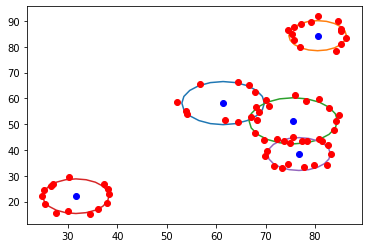

In [60]:
canvas = Canvas(100,100,[])
canvas.drawRandomCircunferencesRadiusRange(5,5,10,20)
canvasCopy = deepcopy(canvas)
canvas.removeRandomPoints(0.3)
canvas.insertNoise(0.5,0.9)
canvas.drawData()

In [61]:
canvas2 = deepcopy(canvasCopy)

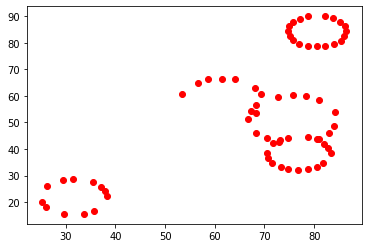

In [62]:
canvas2.removeRandomPoints(0.3)
canvas2.insertNoise(0.1,0.1)
canvas2.drawData()

### Guardamos el Canvas en un archivo Excel


In [63]:
file_path_ex = r"Datos/canvas_export2.csv"
headers = ['Coord X','Coord Y', 'Circulo']
df = pd.DataFrame(canvas.points, columns= headers)
df = df.sample(frac=1)
df.to_csv(file_path_ex, columns=headers, index=False, encoding="utf8")

### Convertimos el archivo Excel en un DataSet y mostramos los datos

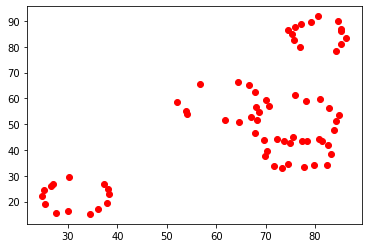

In [64]:
setData = DataSet(file_path_ex)
setData.drawData('ro')

### Ejecutamos el algoritmo y mostramos la solución
<ol>
<li>Instaciamos un objeto ClusteringSolver con el archivo Excel y el número de clusters.</li>
<li>Ejecutamos el algoritmo.</li>
<li>Instaciamos un objeto Solution con el resultado del algoritmo.</li>
<li>Mostramos la solución eliminando el ruido que deseemos.</li>
</ol>

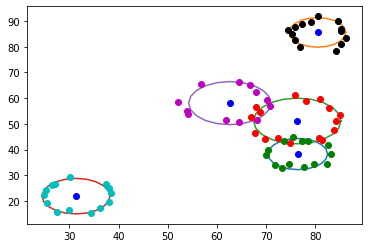

In [65]:
csExample = ClusteringSolver(file_path_ex,5)
csExample.learn(50,1,100,'b')
solEx = Solution(csExample)
solEx.drawSolution(0.8)

## Ejemplos aportados por el tutor
### Ejemplo 1

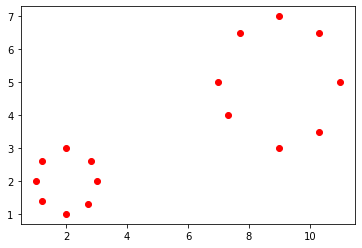

In [66]:
file_path1 = r"Datos/datos_prueba_1.csv"
setData = DataSet(file_path1)
setData.drawData('ro')

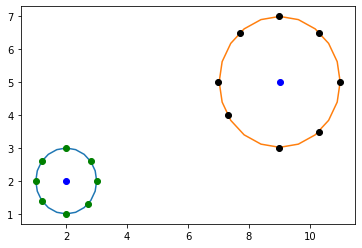

In [67]:
cs1 = ClusteringSolver(file_path1,2)
cs1.learn(10,0.01,50,'c')
sol1 = Solution(cs1)
sol1.drawSolution(0.99)

### Ejemplo 2

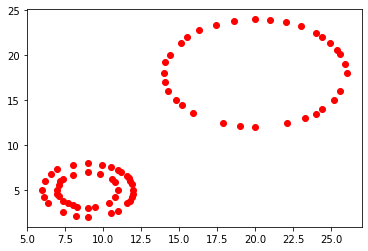

In [68]:
file_path2 = r"C:Datos/datos_prueba_2.csv"
setData = DataSet(file_path2)
setData.drawData('ro')

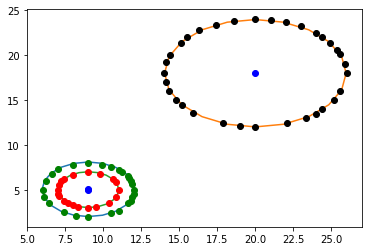

In [69]:
cs2 = ClusteringSolver(file_path2,3)
cs2.learn(20,1,50,'c')
sol2 = Solution(cs2)
sol2.drawSolution(0.95)

## Interfaz de usuario

In [70]:
UI = generateUI()
UI.createAndSolve()

interactive(children=(IntSlider(value=1, description='Nº Circles:', max=10, min=1), IntRangeSlider(value=(5, 1…

interactive(children=(Text(value='', description='File Path:', placeholder='C:..'), FloatSlider(value=0.1, des…

interactive(children=(IntSlider(value=1, description='Generations:', max=500, min=1), IntSlider(value=1, descr…

In [71]:
UI2 = generateUI()
UI2.loadAndSolve()

interactive(children=(Text(value='', description='File Path:', placeholder='C:..'), Button(description='Run In…

interactive(children=(IntSlider(value=1, description='Generations:', max=500, min=1), IntSlider(value=1, descr…